# This is a code that uses Hessian Feature Detector to count dots on dominos

In [5]:
from math import sqrt
from skimage import data
from skimage import io
import matplotlib.pyplot as plt
from skimage.feature import blob_dog, blob_log, blob_doh
from skimage.color import rgb2gray

Read image and convert to grayscale

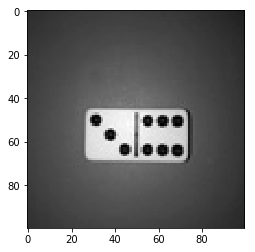

In [15]:
im = io.imread('domino1.jpg',as_gray=True); 
image = rgb2gray(im)
plt.imshow(image,cmap='gray');
image_gray = rgb2gray(im)

Find the Laplacian of the Gaussian function and compute the radii

In [16]:
blobs_log = blob_log(image_gray, max_sigma=50, num_sigma=10, threshold=.1)
blobs_log[:, 2] = blobs_log[:, 2] * sqrt(2)

Find the difference of the Gaussian Function

In [17]:
blobs_dog = blob_dog(image_gray, max_sigma=30, threshold=.5)
blobs_dog[:, 2] = blobs_dog[:, 2] * sqrt(2)

Find the Determinant of the Hessian Function

In [18]:
blobs_doh = blob_doh(image_gray, max_sigma=30, threshold=0.01)

Plot the images

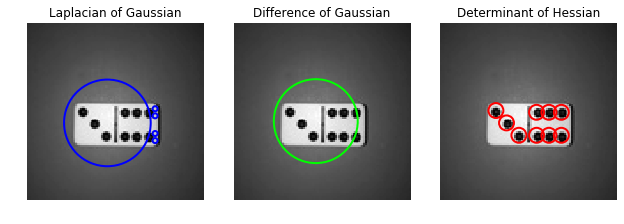

In [19]:
blobs_list = [blobs_log, blobs_dog, blobs_doh]
colors = ['blue', 'lime', 'red']
titles = ['Laplacian of Gaussian', 'Difference of Gaussian',
          'Determinant of Hessian']
sequence = zip(blobs_list, colors, titles)

fig, axes = plt.subplots(1, 3, figsize=(9, 3), sharex=True, sharey=True)
ax = axes.ravel()

for idx, (blobs, color, title) in enumerate(sequence):
    ax[idx].set_title(title)
    ax[idx].imshow(im,cmap='gray')
    for blob in blobs:
        y, x, r = blob
        c = plt.Circle((x, y), r, color=color, linewidth=2, fill=False)
        ax[idx].add_patch(c)
    ax[idx].set_axis_off()

plt.tight_layout()
plt.show()